In [1]:
import pandas as pd
import json
import csv
import numpy as np
import matplotlib.pyplot as plt

with open('data_100.json') as json_file:
    jsondata = json.load(json_file)

In [2]:
r = pd.read_json('data_100.json')
r.head()

,status,resolver,domain,rtime,size_or_error,datetime
0,ok,https://dns.google/dns-query,google.com,64.014572,44.0,2021-07-07 22:01:30
1,ok,https://dns.google/dns-query,netflix.com,68.006540,77.0,2021-07-07 22:01:30
2,ok,https://dns.aa.net.uk/dns-query,google.com,542.697981,44.0,2021-07-07 22:01:30
3,ok,https://dns.aa.net.uk/dns-query,netflix.com,551.804372,213.0,2021-07-07 22:01:30
4,ok,https://adfree.usableprivacy.net/dns-query,google.com,925.139516,44.0,2021-07-07 22:01:31


In [3]:
array_of_resolvers=pd.Series(r['resolver']).unique()

In [4]:
array_of_resolvers[2]

'https://adfree.usableprivacy.net/dns-query'

In [5]:
dict_resp_time_series={}

In [6]:
array_of_resolvers

array(['https://dns.google/dns-query', 'https://dns.aa.net.uk/dns-query',
       'https://adfree.usableprivacy.net/dns-query',
       'https://dns.adguard.com/dns-query',
       'https://dns-family.adguard.com/dns-query',
       'https://doh.in.ahadns.net/dns-query',
       'https://doh.la.ahadns.net/dns-query',
       'https://doh.nl.ahadns.net/dns-query',
       'https://dns.alidns.com/dns-query',
       'https://dnsnl.alekberg.net/dns-query',
       'https://dns.arapurayil.com/dns-query',
       'https://dohtrial.att.net/dns-query',
       'https://dnses.alekberg.net/dns-query',
       'https://doh.bortzmeyer.fr/dns-query',
       'https://dns.circl.lu/dns-query',
       'https://doh.opendns.com/dns-query',
       'https://dns.cloudflare.com/dns-query',
       'https://family.cloudflare-dns.com/dns-query',
       'https://security.cloudflare-dns.com/dns-query',
       'https://odvr.nic.cz/dns-query',
       'https://dns.digitale-gesellschaft.ch/dns-query',
       'https://dns1.ryan-

In [7]:
length=len(array_of_resolvers)
print(length)

66


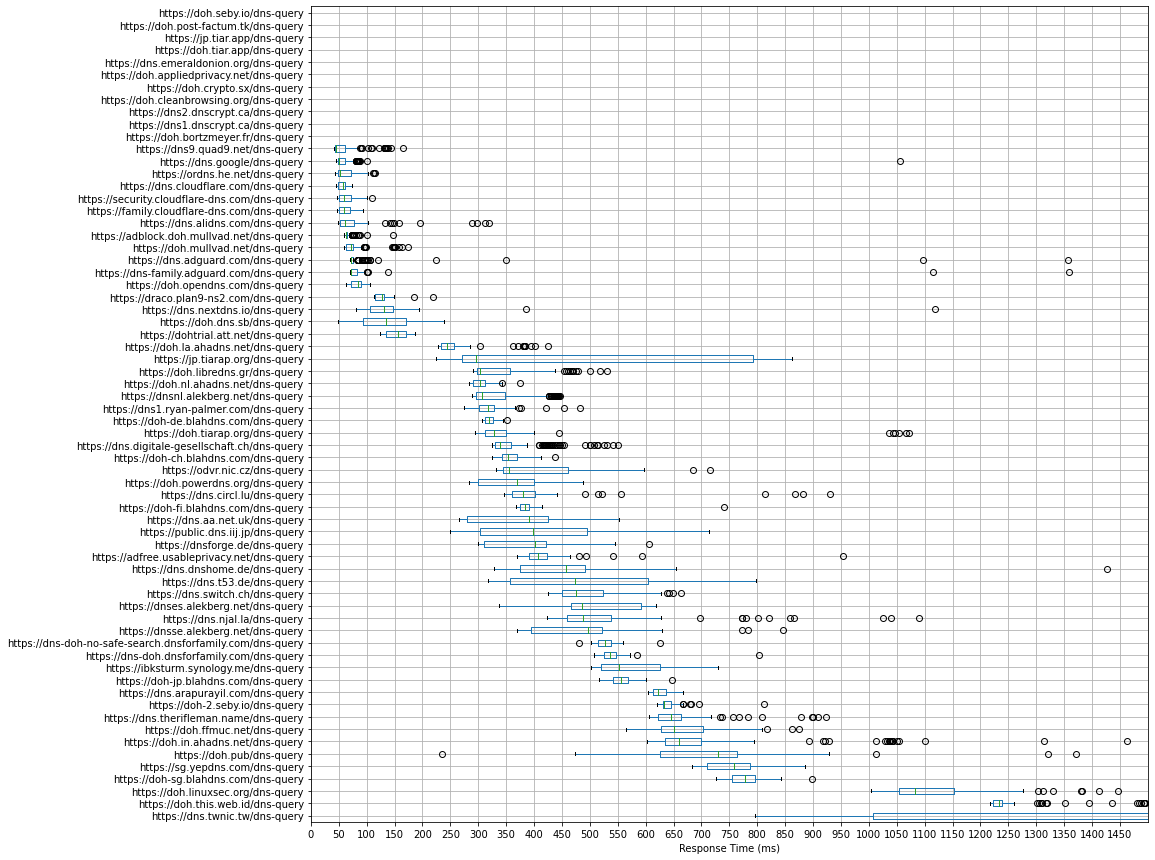

In [8]:
import warnings
warnings.filterwarnings('ignore')

netflix_resp=[0]*length
resp_time_series=[0]*length
for i in range(length):
    netflix_resp[i]=r[(r['resolver']==array_of_resolvers[i]) & (r['domain'] == 'netflix.com')]
    resp_time_series[i]=(netflix_resp[i]['rtime'])
    dict_resp_time_series[array_of_resolvers[i]]= resp_time_series[i]
frame_to_plot=pd.DataFrame(dict_resp_time_series)

medians = frame_to_plot.median()
medians.sort_values(ascending=False, inplace=True)
response_times = frame_to_plot[medians.index]

boxplot=response_times.boxplot(vert=False,figsize=(15,15),showfliers=True)

xl = 1500
plt.xlim(0,xl)
plt.xlabel('Response Time (ms)')
plt.xticks(np.arange(0, xl, step=50))
plt.show()

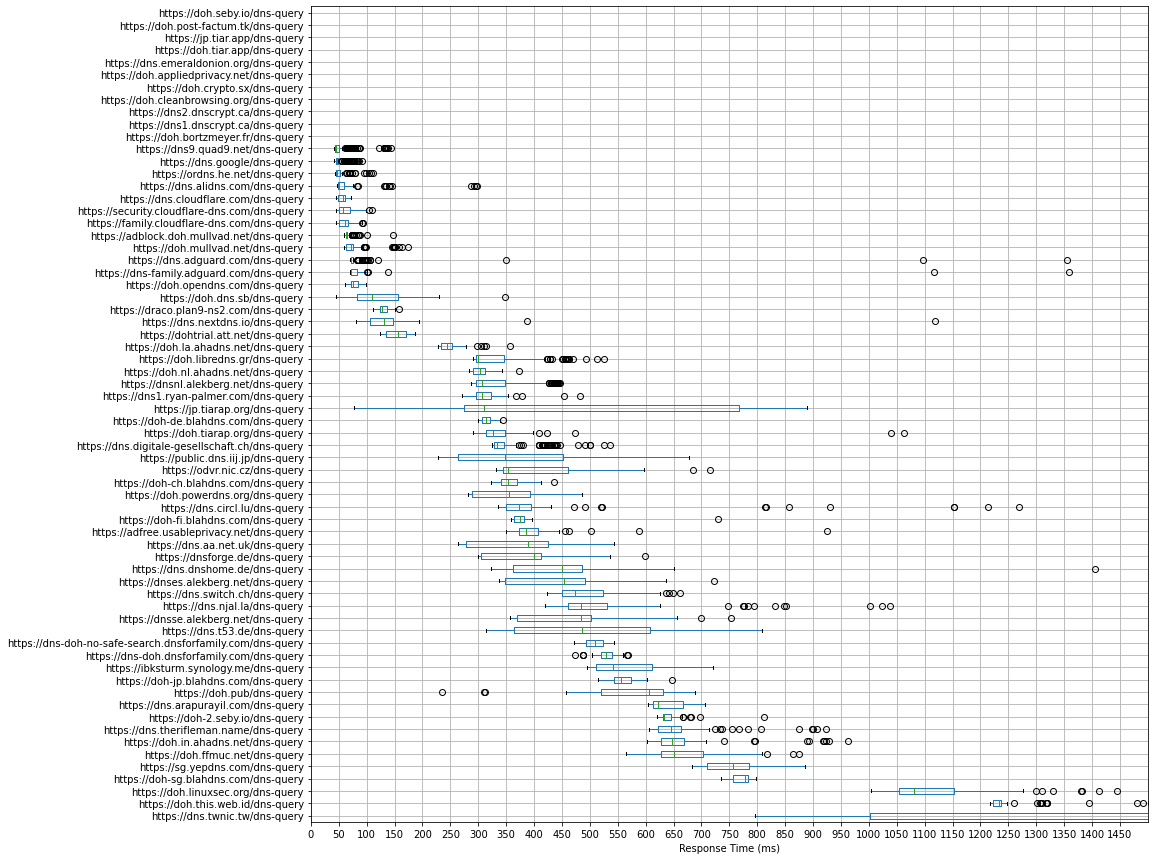

In [9]:
netflix_resp=[0]*length
resp_time_series=[0]*length
dict_resp_time_series={}
for i in range(length):
    netflix_resp[i]=r[(r['resolver']==array_of_resolvers[i]) & (r['domain'] == 'google.com')]
    resp_time_series[i]=(netflix_resp[i]['rtime'])
    dict_resp_time_series[array_of_resolvers[i]]= resp_time_series[i]
frame_to_plot=pd.DataFrame(dict_resp_time_series)
medians = frame_to_plot.median()
medians.sort_values(ascending=False, inplace=True)
response_times = frame_to_plot[medians.index]

boxplot=response_times.boxplot(vert=False,figsize=(15,15),showfliers=True)

xl = 1500
plt.xlim(0,xl)
plt.xlabel('Response Time (ms)')
plt.xticks(np.arange(0, xl, step=50))
plt.show()

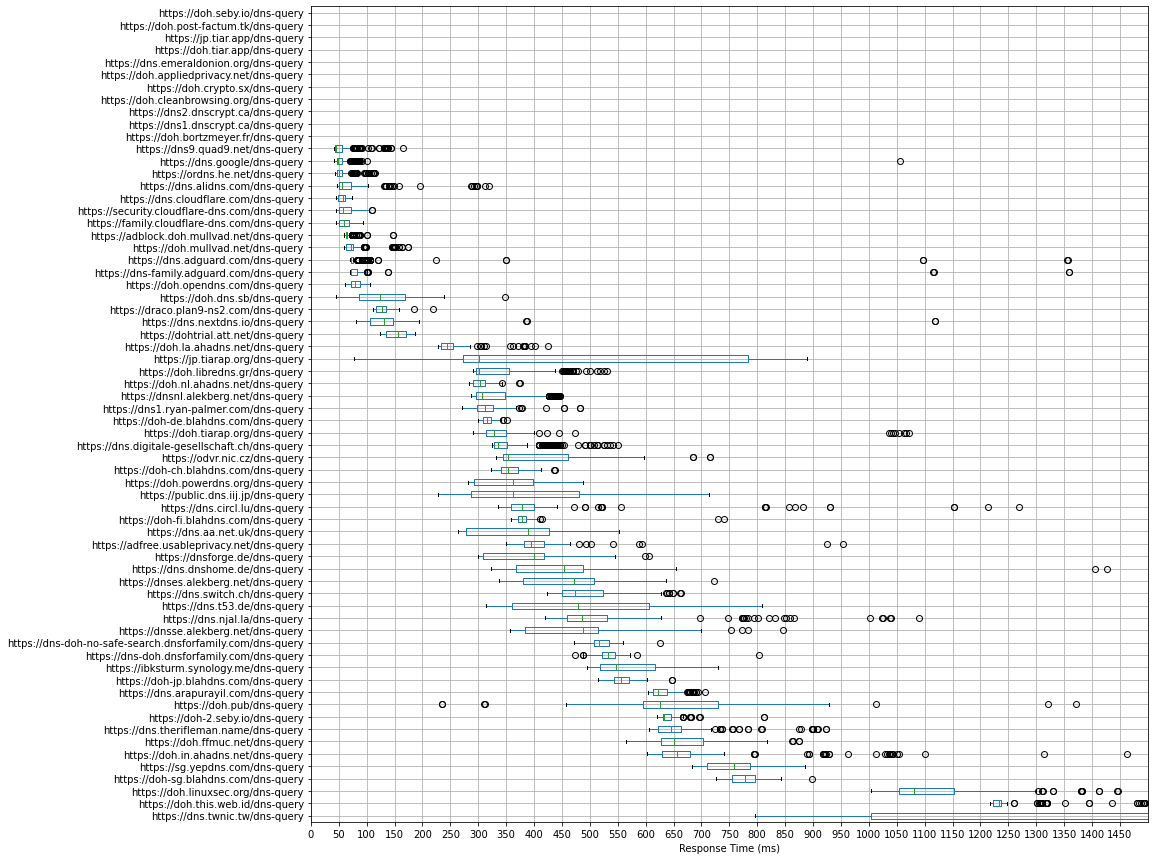

In [10]:
netflix_resp=[0]*length
resp_time_series=[0]*length
dict_resp_time_series={}
for i in range(length):
    netflix_resp[i]=r[(r['resolver']==array_of_resolvers[i])]
    resp_time_series[i]=(netflix_resp[i]['rtime'])
    dict_resp_time_series[array_of_resolvers[i]]= resp_time_series[i]
frame_to_plot=pd.DataFrame(dict_resp_time_series)
medians = frame_to_plot.median()
medians.sort_values(ascending=False, inplace=True)
response_times = frame_to_plot[medians.index]

boxplot=response_times.boxplot(vert=False,figsize=(15,15),showfliers=True)

xl = 1500
plt.xlim(0,xl)
plt.xlabel('Response Time (ms)')
plt.xticks(np.arange(0, xl, step=50))
plt.show()